In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [3]:
# Load in the Data:

cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
print("x_train.shape:", x_train.shape)
print("y_train.shape:", y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
x_train.shape: (50000, 32, 32, 3)
y_train.shape: (50000,)


In [4]:
# Number of classes 
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [5]:
# Build the model:
i = Input(shape=x_train[0].shape)
print("Input Shape:", i)
#x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
#x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
#x = Conv2D(128, (3,3), strides=2, activation='relu')(x) 

x = Conv2D(32, (3,3), padding = 'same', activation='relu')(i)
print("First Convolution Layer output shape: ", x.shape)
x = BatchNormalization()(x)

x = Conv2D(64, (3,3), padding = 'same', activation='relu')(x)
print("Second Convolution Layer output shape: ", x.shape)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
print("First Max Pooling layer Output:", x.shape)
##### x = Dropout(0.2)(x)

x = Conv2D(128, (3,3), padding = 'same', activation='relu')(x)
x = BatchNormalization()(x)
print("Third Convolution Layer output shape: ", x.shape)

x = Conv2D(128, (3,3), padding = 'same', activation='relu')(x)
x = BatchNormalization()(x)
print("Fourth Convolution Layer output shape: ", x.shape)
x = MaxPooling2D((2,2))(x)
print("Second Max Pooling layer Output:", x.shape)
##### x = Dropout(0.2)(x)

x = Conv2D(128, (3,3), padding = 'same', activation='relu')(x)
x = BatchNormalization()(x)
print("Fifth Convolution Layer output shape: ", x.shape)


x = Conv2D(128, (3,3), padding = 'same', activation='relu')(x)
x = BatchNormalization()(x)
print("Sixth Convolution Layer output shape: ", x.shape)

x = MaxPooling2D((2,2))(x)
##### x = Dropout(0.2)(x)
print("Third Max Pooling layer Output:", x.shape)

##### x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
print("Flatten layer Output:", x.shape)
x = Dropout(0.2)(x)
x = Dense(1024, activation='relu')(x)
print("First Dense layer Output:", x.shape)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)
print("Second Dense layer Output:", x.shape)

model = Model(i, x)


Input Shape: KerasTensor(type_spec=TensorSpec(shape=(None, 32, 32, 3), dtype=tf.float32, name='input_1'), name='input_1', description="created by layer 'input_1'")
First Convolution Layer output shape:  (None, 32, 32, 32)
Second Convolution Layer output shape:  (None, 32, 32, 64)
First Max Pooling layer Output: (None, 16, 16, 64)
Third Convolution Layer output shape:  (None, 16, 16, 128)
Fourth Convolution Layer output shape:  (None, 16, 16, 128)
Second Max Pooling layer Output: (None, 8, 8, 128)
Fifth Convolution Layer output shape:  (None, 8, 8, 128)
Sixth Convolution Layer output shape:  (None, 8, 8, 128)
Third Max Pooling layer Output: (None, 4, 4, 128)
Flatten layer Output: (None, 2048)
First Dense layer Output: (None, 1024)
Second Dense layer Output: (None, 10)


In [6]:
# Compile and fit
# Note: make sure your using GPU!

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)

Epoch 1/50
1563/1563 [==============================] - 20s 8ms/step - loss: 1.6993 - accuracy: 0.4603 - val_loss: 1.0285 - val_accuracy: 0.6405
Epoch 2/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.8563 - accuracy: 0.7019 - val_loss: 0.8519 - val_accuracy: 0.7117
Epoch 3/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.6728 - accuracy: 0.7687 - val_loss: 0.9194 - val_accuracy: 0.7072
Epoch 4/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.5535 - accuracy: 0.8084 - val_loss: 0.8076 - val_accuracy: 0.7355
Epoch 5/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.4438 - accuracy: 0.8489 - val_loss: 0.5808 - val_accuracy: 0.8048
Epoch 6/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3734 - accuracy: 0.8720 - val_loss: 0.6317 - val_accuracy: 0.8106
Epoch 7/50
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3068 - accuracy: 0.8940 - val_loss: 0.6222 - val_ac

In [7]:
# Fit with data augmentation
# Note: if you run this AFTER calling the previous model.fit(), it will Continue where it left off


batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,
                                                                 height_shift_range=0.1,
                                                                 horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator,
                        validation_data = (x_test, y_test),
                        steps_per_epoch = steps_per_epoch,
                        epochs=50)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.4912 - accuracy: 0.8455 - val_loss: 0.4605 - val_accuracy: 0.8549
Epoch 2/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3842 - accuracy: 0.8744 - val_loss: 0.4518 - val_accuracy: 0.8584
Epoch 3/50
1562/1562 [==============================] - 27s 18ms/step - loss: 0.3495 - accuracy: 0.8840 - val_loss: 0.4318 - val_accuracy: 0.8631
Epoch 4/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.3269 - accuracy: 0.8922 - val_loss: 0.3898 - val_accuracy: 0.8723
Epoch 5/50
1562/1562 [==============================] - 28s 18ms/step - loss: 0.3081 - accuracy: 0.8972 - val_loss: 0.3893 - val_accuracy: 0.8699
Epoch 6/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.2971 - accuracy: 0.9022 - val_loss: 0.4000 - val_accuracy: 0.8751
Epoch 7/50
1562/1562 [==============================] - 27s 17ms/step - loss: 0.2872 - accuracy: 0.9034 - val_loss: 0.4113 -

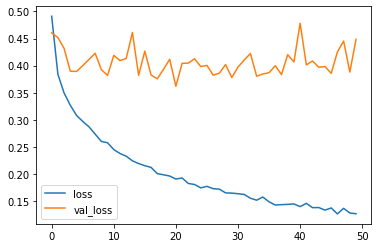

In [8]:
#plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

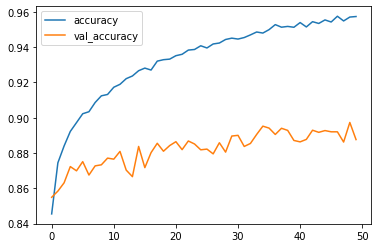

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

Confusion Matrix without normalization
[[915   4  13   3   7   1   3   1  34  19]
 [  6 945   0   1   0   1   0   0   7  40]
 [ 43   1 823  21  24  30  32  16   3   7]
 [ 17   5  32 744  19  97  40  14  15  17]
 [ 18   1  36  21 828  19  34  34   5   4]
 [ 15   3  15  63  18 849  12  19   2   4]
 [  6   3   7  17   3   7 947   1   7   2]
 [  7   0   5  13  16  25   4 921   1   8]
 [ 26   6   2   2   0   2   0   0 950  12]
 [  7  21   0   3   1   1   0   0  13 954]]


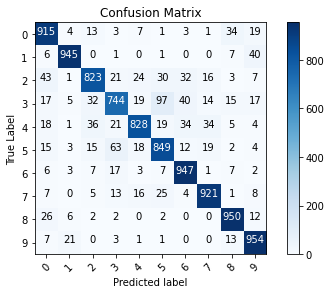

In [10]:
#Plot Confusion Matrix:

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm ,classes,
                          normalize = False,
                          title = 'Confusion Matrix',
                          cmap=plt.cm.Blues):

  if normalize:
    cm =cm.astype('float') / cm.sum(axis=1)[:,np.newaxis]
    print("Normalize Confusion Matrix")
  else:
    print("Confusion Matrix without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)


  fmt='.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i , j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i,j], fmt),
            horizontalalignment="center",
            color = "white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [11]:
# Label Mapping:

labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

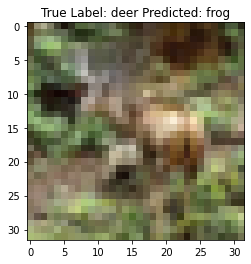

In [12]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [13]:
# Now the model is so large, it's useful to summarize it
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856 

# Saving the Model:


In [18]:
model.save('cifar_improved.h5')

In [19]:
#Check that the model file exists

!ls -lh

total 61M
-rw-r--r-- 1 root root  31M Jan 24 18:31 cifar_imporoved.h5
-rw-r--r-- 1 root root  31M Jan 24 18:32 cifar_improved.h5
drwxr-xr-x 1 root root 4.0K Jan 20 17:27 sample_data


In [20]:
# Lets Load the model and confirm that it still works

model = tf.keras.models.load_model('cifar_improved.h5')
print(model.layers)


[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7efbc52bed68>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efbc52ca6d8>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7efbc52cabe0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efbc52cb128>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7efbc52cb710>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efbc52cbba8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efbc52cbeb8>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7efbc525c4e0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7efbc525c978>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7efbc525cf60>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7efbc525f438>, <tensorflow.python.keras.layers.convolutional.Conv2D obje

In [21]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       73856 